## Analysis:
1. There is an obvious relationship between latitude and temperature.  The closer to the equator the warmer the temperature.
2. The minimum and maximum temperatures in a latitude seem to stay between 30 degrees F of each other
3. There also appears to be a relationship between humidity and latitude.  The closer to the equator the greater the 80-100% humidity concentration
4. There is no discernable relationship between cloudiness and latitude
5. Average wind speed appears to be between 0-10 mph regardless of latutitude

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests, time, json

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [15]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
# Had to bump this up to 3500 to get enough viable data down the line
lats = np.random.uniform(low=-90.000, high=90.000, size=2500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

867

In [3]:
# test line to get the correct keys for the datasets\n",
response = requests.get('http://api.openweathermap.org/data/2.5/weather?q=portland&units=imperial&appid=e08650aa218de36f561d54df8fd78503').json()
print(json.dumps(response, indent=2, sort_keys=True))

{
  "base": "stations",
  "clouds": {
    "all": 90
  },
  "cod": 200,
  "coord": {
    "lat": 45.52,
    "lon": -122.67
  },
  "dt": 1533772380,
  "id": 5746545,
  "main": {
    "humidity": 30,
    "pressure": 1011,
    "temp": 92.41,
    "temp_max": 95,
    "temp_min": 91.4
  },
  "name": "Portland",
  "sys": {
    "country": "US",
    "id": 2274,
    "message": 0.0107,
    "sunrise": 1533819851,
    "sunset": 1533871638,
    "type": 1
  },
  "visibility": 16093,
  "weather": [
    {
      "description": "smoke",
      "icon": "50d",
      "id": 711,
      "main": "Smoke"
    }
  ],
  "wind": {
    "deg": 310,
    "speed": 3.36
  }
}


In [16]:
# create a dataset to hold all the information we're about to collect
file = pd.DataFrame({'City Name': cities,
                    'Name': "",
                    'Country': "",
                    'Latitude': "",
                    'Clouds': "",
                    'Humidity': "",
                    'Wind Speed': "",
                    'Wind Speed': "",
                    'Temperature': ""})

file.head(3)

,City Name,Clouds,Country,Humidity,Latitude,Name,Temperature,Wind Speed
0,taolanaro,,,,,,,
1,ushuaia,,,,,,,
2,albany,,,,,,,


## Perform API Calls

In [6]:
# OpenWeatherMap API Key
# api_key = api_keys.api_key
api = 'e08650aa218de36f561d54df8fd78503'
url = 'http://api.openweathermap.org/data/2.5/weather?q='

# empty lists to hold the information collected
name = []
country = []
clouds = []
humidity = []
wind_speed = []
latitude = []
temp = []

print(f"Begin API calls")
print(f"---------------")

# loop through API requests and parse necessary information, in imperial units
for index, city in file.iterrows():
# sleep for three sec in between to keep the API from timing out
    time.sleep(3)
    response = requests.get(url + city[0] + '&units=imperial&appid=' + api).json()
    print(f"City Name: ", city[0])
    try:
        file.loc[index, 'Name'] = response['name']
        file.loc[index, 'Country'] = response['sys']['country']
        file.loc[index, 'Clouds'] = response['clouds']['all']
        file.loc[index, 'Humidity'] = response['main']['humidity']
        file.loc[index, 'Temperature'] = response['main']['temp']
        file.loc[index, 'Wind Speed'] = response['wind']['speed']
        file.loc[index, 'Latitude'] = response['coord']['lat']
        print(f"City ID: ", response['id'])
        print(F"--------------------------")
    except KeyError:
        print(f"Information missing for ", city[0])
        print(f"-------------------------------------")
        pass
    
    print(f"**REQUESTS COMPLETE**")

Begin API calls
---------------
City Name:  kovdor
City ID:  543508
--------------------------
City Name:  hobart
City ID:  2163355
--------------------------
City Name:  norman wells
City ID:  6089245
--------------------------
City Name:  muriwai beach
City ID:  2186363
--------------------------
City Name:  turayf
City ID:  101312
--------------------------
City Name:  port alfred
City ID:  964432
--------------------------
City Name:  marcona
Information missing for  marcona
-------------------------------------
City Name:  cape town
City ID:  3369157
--------------------------
City Name:  mataura
City ID:  6201424
--------------------------
City Name:  sitka
City ID:  4267710
--------------------------
City Name:  hilo
City ID:  5855927
--------------------------
City Name:  kutum
City ID:  371745
--------------------------
City Name:  punta arenas
City ID:  3874787
--------------------------
City Name:  eyl
City ID:  60019
--------------------------
City Name:  butaritari
City ID

City Name:  gamovo
City ID:  562070
--------------------------
City Name:  pemangkat
Information missing for  pemangkat
-------------------------------------
City Name:  khatanga
City ID:  2022572
--------------------------
City Name:  maitum
City ID:  1703471
--------------------------
City Name:  faya
City ID:  110690
--------------------------
City Name:  belushya guba
Information missing for  belushya guba
-------------------------------------
City Name:  sinnamary
City ID:  3380290
--------------------------
City Name:  chifeng
City ID:  2038067
--------------------------
City Name:  shelburne
City ID:  6145890
--------------------------
City Name:  portland
City ID:  5746545
--------------------------
City Name:  madinat sittah uktubar
City ID:  353219
--------------------------
City Name:  bambous virieux
City ID:  1106677
--------------------------
City Name:  arroio dos ratos
City ID:  3471425
--------------------------
City Name:  kavaratti
City ID:  1267390
-----------------

City Name:  bolungarvik
Information missing for  bolungarvik
-------------------------------------
City Name:  filingue
City ID:  2444995
--------------------------
City Name:  lebu
City ID:  344979
--------------------------
City Name:  sao filipe
City ID:  3374210
--------------------------
City Name:  brae
City ID:  2654970
--------------------------
City Name:  umm durman
Information missing for  umm durman
-------------------------------------
City Name:  dromolaxia
City ID:  146400
--------------------------
City Name:  haines junction
City ID:  5969025
--------------------------
City Name:  nioki
City ID:  2311968
--------------------------
City Name:  lorengau
City ID:  2092164
--------------------------
City Name:  khilok
City ID:  2022463
--------------------------
City Name:  palmer
City ID:  2067070
--------------------------
City Name:  roma
City ID:  6539761
--------------------------
City Name:  cabo san lucas
City ID:  3985710
--------------------------
City Name:  ilul

City Name:  hattiesburg
City ID:  4429295
--------------------------
City Name:  saryshagan
Information missing for  saryshagan
-------------------------------------
City Name:  lahaina
City ID:  5849996
--------------------------
City Name:  inhambane
City ID:  1045114
--------------------------
City Name:  amahai
City ID:  1651591
--------------------------
City Name:  saint anthony
City ID:  5606187
--------------------------
City Name:  dunedin
City ID:  2191562
--------------------------
City Name:  lingen
City ID:  2644456
--------------------------
City Name:  inta
City ID:  1505579
--------------------------
City Name:  cascais
City ID:  2269594
--------------------------
City Name:  mbigou
City ID:  2398929
--------------------------
City Name:  klisura
City ID:  730301
--------------------------
City Name:  ambanja
City ID:  1083724
--------------------------
City Name:  russell
City ID:  3844421
--------------------------
City Name:  jackson
City ID:  4632595
---------------

ConnectionError: ('Connection aborted.', ConnectionAbortedError(10053, 'An established connection was aborted by the software in your host machine', None, 10053, None))

In [7]:
# double check there are enough values to satisfy the requirements
len(file['Temperature'])
# print(file['Temperature'].nunique())

1025

In [8]:
# dataset for the information collected
df = pd.DataFrame({'City': file['Name'],
                    'Country': file['Country'],
                    'Latitude': file['Latitude'],
                    'Clouds': file['Clouds'],
                    'Humidity': file['Humidity'],
                    'Wind Speed': file['Wind Speed'],
                    'Temperature': file['Temperature']
                    })
df.head(3)

,City,Clouds,Country,Humidity,Latitude,Temperature,Wind Speed
0,Kovdor,76,RU,77,67.56,52.71,6.06
1,Hobart,75,AU,57,-42.88,51.8,12.75
2,Norman Wells,90,CA,93,65.28,48.2,18.34


In [9]:
# fill blank rows in with na and drop them from the dataframe
df['Temperature'].replace('', np.nan, inplace=True)
df.dropna(subset=['Temperature'], how='any', inplace=True)

## Temp vs Latitude Scatter Plot

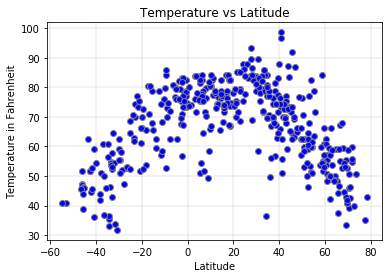

In [10]:
temp_lat = plt.scatter(df['Latitude'], df['Temperature'], s=None, marker="o", alpha=1, facecolors="blue", edgecolors="grey")

# label the plot
plt.title("Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature in Fahrenheit")
plt.grid(color='grey', linewidth=.2)

# Save Figure
plt.savefig("Temp_vs_Latitude.png", edgecolor='black')
plt.show()

## Humidity vs Latitude Scatter Plot

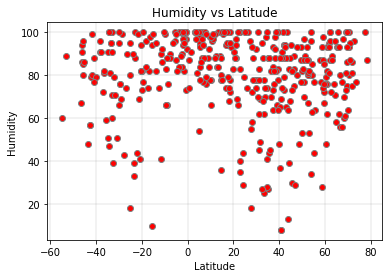

In [11]:
hum_lat = plt.scatter(df['Latitude'], df['Humidity'], s=None, marker="o", alpha=1, facecolors="red", edgecolors="grey")

# label the plot
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(color='grey', linewidth=.2)

# Save Figure
plt.savefig("Humidity_vs_Latitude.png", edgecolor='black')
plt.show()

## Cloudiness vs Latitude Scatter Plot

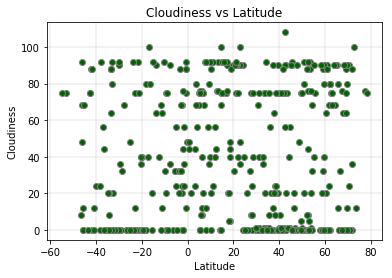

In [12]:
cloud_lat = plt.scatter(df['Latitude'], df['Clouds'], s=None, marker="o", alpha=1, facecolors="darkgreen", edgecolors="grey")

# label the plot
plt.title("Cloudiness vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(color='grey', linewidth=.2)

# Save Figure
plt.savefig("Cloudiness_vs_Latitude.png", edgecolor='black')
plt.show()

## Wind Speed vs Latitude Scatter Plot

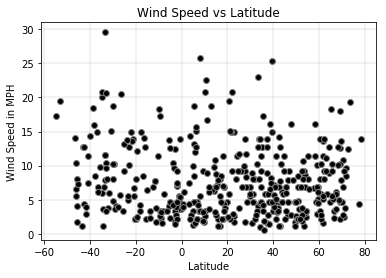

In [13]:
wind_lat = plt.scatter(df['Latitude'], df['Wind Speed'], s=None, marker="o", alpha=1, facecolors="black", edgecolors="grey")

# label the plot
plt.title("Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed in MPH")
plt.grid(color='grey', linewidth=.2)

# Save Figure
plt.savefig("Wind_Speed_vs_Latitude.png", edgecolor='black')
plt.show()

In [17]:
# export dataframe to csv file
df.to_csv('output_data_file.csv')